In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

C:\Users\2003j\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
titanic=sns.load_dataset('titanic')

In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [16]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male', 'alone']
target = 'survived'

In [17]:
x=titanic[features]
y=titanic[target]

In [18]:
x

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alone
0,3,male,22.0,1,0,7.2500,Third,man,True,False
1,1,female,38.0,1,0,71.2833,First,woman,False,False
2,3,female,26.0,0,0,7.9250,Third,woman,False,True
3,1,female,35.0,1,0,53.1000,First,woman,False,False
4,3,male,35.0,0,0,8.0500,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,Second,man,True,True
887,1,female,19.0,0,0,30.0000,First,woman,False,True
888,3,female,NaN,1,2,23.4500,Third,woman,False,False
889,1,male,26.0,0,0,30.0000,First,man,True,True


In [19]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [20]:
y.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [24]:
x_train

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alone
692,3,male,NaN,0,0,56.4958,Third,man,True,True
481,2,male,NaN,0,0,0.0000,Second,man,True,True
527,1,male,NaN,0,0,221.7792,First,man,True,True
855,3,female,18.0,0,1,9.3500,Third,woman,False,False
801,2,female,31.0,1,1,26.2500,Second,woman,False,False
...,...,...,...,...,...,...,...,...,...,...
359,3,female,NaN,0,0,7.8792,Third,woman,False,True
258,1,female,35.0,0,0,512.3292,First,woman,False,True
736,3,female,48.0,1,3,34.3750,Third,woman,False,False
462,1,male,47.0,0,0,38.5000,First,man,True,True


In [25]:
numerical_features=x_train.select_dtypes(include=['number']).columns.tolist()

In [26]:
categorical_features=x_train.select_dtypes(include=['object','category']).columns.tolist()

In [27]:
numerical_features


['pclass', 'age', 'sibsp', 'parch', 'fare']

In [28]:
categorical_features

['sex', 'class', 'who']

In [30]:
numerical_pipeline=Pipeline(steps=[('inputer',SimpleImputer(strategy='median')),('scaler',StandardScaler())])

In [35]:
categorical_pipeline=Pipeline(steps=[('inputer',SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [36]:
numerical_pipeline,categorical_pipeline


(Pipeline(steps=[('inputer', SimpleImputer(strategy='median')),
                 ('scaler', StandardScaler())]),
 Pipeline(steps=[('inputer', SimpleImputer(strategy='most_frequent')),
                 ('onehot', OneHotEncoder(handle_unknown='ignore'))]))

In [42]:
preprocessor=ColumnTransformer(transformers=[('num',numerical_pipeline,numerical_features),('cat',categorical_pipeline,categorical_features)])

In [43]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('inputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['pclass', 'age', 'sibsp', 'parch', 'fare']),
                                ('cat',
                                 Pipeline(steps=[('inputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'class', 'who'])])

In [47]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('classifier',RandomForestClassifier(random_state=42))])


In [48]:
pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('inputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('inputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'class', 'who'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [49]:
param_grid = {'classifier__n_estimators': [50, 100],'classifier__max_depth': [None, 10, 20],'classifier__min_samples_split': [2, 5]}

In [50]:
param_grid

{'classifier__n_estimators': [50, 100],
 'classifier__max_depth': [None, 10, 20],
 'classifier__min_samples_split': [2, 5]}

In [51]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [52]:
cv

StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

In [53]:
model=GridSearchCV(estimator=pipeline,cv=cv,param_grid=param_grid,scoring='accuracy',verbose=2)

In [54]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('inputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pclass',
                                                                          'age',
                                                                          'sibsp',
                                                                          'parch',
                                                                          'fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('inputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'class',
                                                                          'who'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [55]:
y_pred=model.predict(x_test)

In [56]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



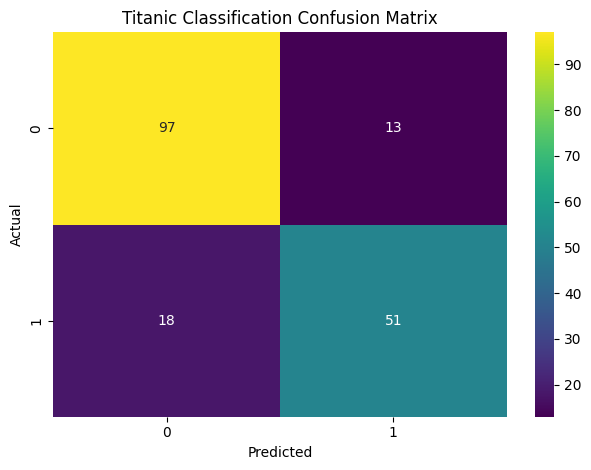

In [60]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d')
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [61]:
model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

array(['sex_female', 'sex_male', 'class_First', 'class_Second',
       'class_Third', 'who_child', 'who_man', 'who_woman'], dtype=object)

In [62]:
feature_importances = model.best_estimator_['classifier'].feature_importances_
feature_names = numerical_features + list(model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

In [63]:
feature_names

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'sex_female',
 'sex_male',
 'class_First',
 'class_Second',
 'class_Third',
 'who_child',
 'who_man',
 'who_woman']

In [64]:
feature_importances

array([0.04656092, 0.18928788, 0.05034678, 0.03310638, 0.22031199,
       0.1072449 , 0.12060565, 0.02196285, 0.01160451, 0.04192236,
       0.01419383, 0.09622032, 0.04663162])

In [65]:
importance_df = pd.DataFrame({'Feature': feature_names,'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

In [66]:
importance_df

,Feature,Importance
4,fare,0.220312
1,age,0.189288
6,sex_male,0.120606
5,sex_female,0.107245
11,who_man,0.096220
2,sibsp,0.050347
12,who_woman,0.046632
0,pclass,0.046561
9,class_Third,0.041922
3,parch,0.033106


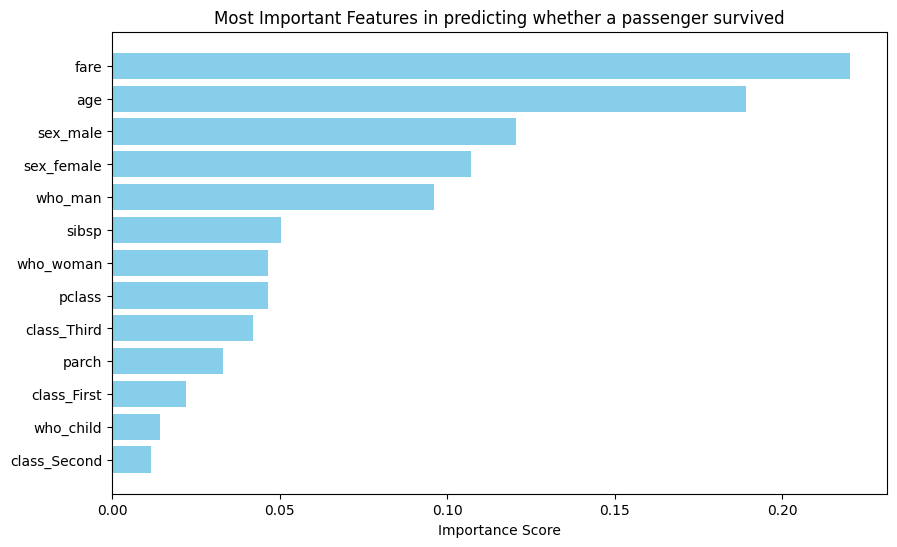

In [67]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis() 
plt.title('Most Important Features in predicting whether a passenger survived')
plt.xlabel('Importance Score')
plt.show()